In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('../datasets/diamond_pricing.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339
5,41,17016,1616.173790
6,40,19145,747.193426
7,35,17180,1718.235458
8,146,14121,2044.434408
9,120,17102,1147.952682


In [4]:
fig = px.scatter_3d(data_frame=df, x='Paleonium',y='Pressure',z='Price')
fig.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [7]:
X = df[['Paleonium','Pressure']]
y = df['Price']

In [8]:
xtrain,xtest,ytrain,ytest  = train_test_split(X,y, test_size=.2, random_state=0)

In [9]:
linreg = LinearRegression()
treereg = DecisionTreeRegressor(max_depth=6)

In [10]:
linreg.fit(X,y)
treereg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [12]:
lin_score = linreg.score(xtest,ytest)*100
lin_score

12.385225933290943

In [13]:
tree_score = treereg.score(xtest,ytest)*100
tree_score

93.35000889589854

In [14]:
ypredL =  linreg.predict(X)
ypredT =  treereg.predict(X)

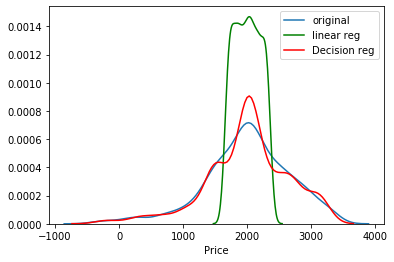

In [20]:
sns.distplot(y,label='original',hist=False)
sns.distplot(ypredL,label='linear reg',color='green',hist=False)
sns.distplot(ypredT,label='Decision reg',color='red',hist=False)
plt.show()

In [21]:
from sklearn.tree import plot_tree

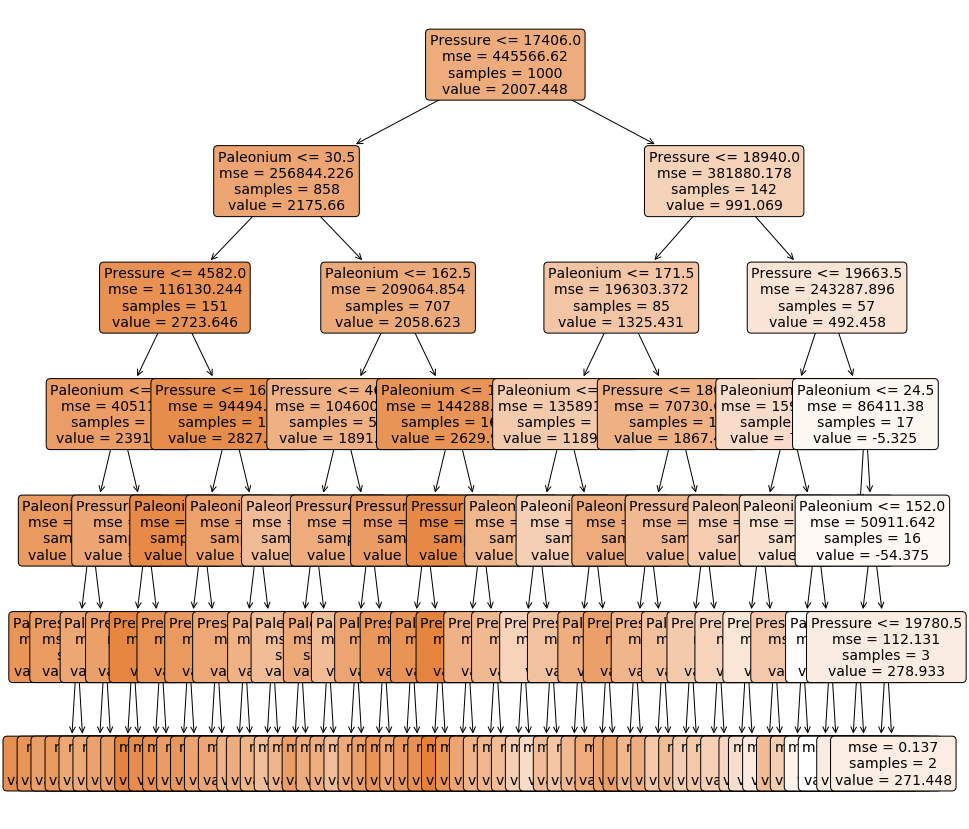

In [23]:
plt.figure(figsize=(15,15))
plot_tree(treereg,feature_names=X.columns.tolist(), filled=True,rounded=True,fontsize=14)
plt.show()